In [1]:
!git clone https://github.com/OmarOsman/Reinforcement-Learning-Trading-

Cloning into 'Reinforcement-Learning-Trading-'...
remote: Enumerating objects: 30, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 30 (delta 3), reused 30 (delta 3), pack-reused 0
Unpacking objects: 100% (30/30), done.


In [2]:
cd Reinforcement-Learning-Trading-/

/content/Reinforcement-Learning-Trading-


In [0]:
import gym
import gym_anytrading
from gym_anytrading.envs import TradingEnv, ForexEnv, StocksEnv, Actions, Positions 
from gym_anytrading.datasets import FOREX_EURUSD_1H_ASK, STOCKS_GOOGL
from actor_critic_discrete import Agent
import matplotlib.pyplot as plt

In [4]:
env = gym.make('forex-v0', 
               frame_bound=(10, 6225), 
               window_size=10)
                                       
agent = Agent(alpha=0.0001, 
              input_dims=[env.frame_bound[0],2], # timestep , number of signal features 
              gamma=0.99, 
              n_actions=2, 
              layer1_size=128, 
              layer2_size=32)

num_episodes = 100 # need big number to able to learn something 
ep_reward = 0
total_reward = 0
done = False 
running_reward = 0
log_interval = 10
reward_history = []


for i_episode in range(num_episodes):
    observation = env.reset()
    ep_reward = 0
    while not done :
        action = agent.choose_action(observation)
        observation, reward, done, info = env.step(action)
        agent.rewards.append(reward)
        ep_reward += reward 
           
    agent.learn(observation, reward, done)
    done = False   
    running_reward = 0.05 * ep_reward + (1 - 0.05) * running_reward
    
    if i_episode % log_interval == 0:
        print('Episode {}\tLast reward: {:.2f}\tAverage reward: {:.2f}'.format(i_episode, ep_reward, running_reward))
    reward_history.append(running_reward)

Episode 0	Last reward: -339.90	Average reward: -17.00
Episode 10	Last reward: 792.60	Average reward: 243.04
Episode 20	Last reward: 723.50	Average reward: 64.89
Episode 30	Last reward: 1276.30	Average reward: 100.82
Episode 40	Last reward: 992.30	Average reward: 285.29
Episode 50	Last reward: 468.90	Average reward: 236.17
Episode 60	Last reward: -462.40	Average reward: 108.23
Episode 70	Last reward: -499.60	Average reward: 109.48
Episode 80	Last reward: 626.00	Average reward: 129.90
Episode 90	Last reward: -153.60	Average reward: -98.58


In [10]:
#running one example 
done = False
observation = env.reset()
ep_reward = 0
while not done :
    action = agent.choose_action(observation)
    observation, reward, done, info = env.step(action)
    ep_reward += reward 
    if done:
        print("info:", info)
    


info: {'total_reward': 1023.2000000000965, 'total_profit': 0.6484728396200953, 'position': 1}


In [8]:
#running same envorment without Actor Critic 
done = False
org_env = gym.make('forex-v0', frame_bound=(10, 6225), window_size=10)
observation = org_env.reset()
while True:
    action = org_env.action_space.sample()
    observation, reward, done, info = org_env.step(action)
    if done:
        print("info:", info)
        break


info: {'total_reward': -2210.7000000000116, 'total_profit': 0.5593466581803774, 'position': 0}


In [0]:
import matplotlib.pyplot as plt 
import numpy as np

def plotLearning(scores, x=None, window=5):   
    N = len(scores)
    running_avg = np.empty(N)
    for t in range(N):
        running_avg[t] = np.mean(scores[max(0, t-window):(t+1)])
    if x is None:
        x = [i for i in range(N)]
    plt.ylabel('Losses')       
    plt.xlabel('episodes')                     
    plt.plot(x, running_avg)

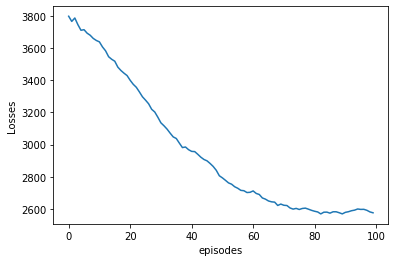

In [17]:
# we see the agent losses (policy + value) decrease every episode 
plotLearning(agent.losses,window=10)